# **Setup**

In [4]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import shap

ModuleNotFoundError: No module named 'shap'

# **Data Import**

In [3]:
!kaggle datasets download -d conorsully1/credit-score --unzip


  0%|          | 0.00/177k [00:00<?, ?B/s]
100%|██████████| 177k/177k [00:00<00:00, 710kB/s]
100%|██████████| 177k/177k [00:00<00:00, 706kB/s]


In [5]:
# Load dataset and add squared term
credit_score = pd.read_csv('credit_score.csv')

print(credit_score.shape)
print(credit_score.columns)
credit_score.head()

(1000, 87)
Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HO

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [6]:
# Target variable
y = credit_score['CREDIT_SCORE']
y.head()

0    444
1    625
2    469
3    559
4    473
Name: CREDIT_SCORE, dtype: int64

In [7]:
# Add squared term
credit_score['R_EXPENDITURE_SQR'] = credit_score['R_EXPENDITURE']**2

credit_score.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT,R_EXPENDITURE_SQR
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0625,High,1,0,0,0,0,444,1,0.336052
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.2222,No,1,0,0,1,0,625,0,0.128164
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,0.0578,High,1,0,0,1,0,469,1,0.324672
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,0.1282,High,1,0,0,1,0,559,0,0.248502
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.0568,High,1,1,1,1,1,473,0,0.211968


# **Shortlist Data**

In [8]:
# Select features
X = credit_score[['INCOME','R_DEBT_INCOME','R_EXPENDITURE','R_EXPENDITURE_SQR','R_ENTERTAINMENT','CAT_GAMBLING']].copy()

# One-hot encoding
X['GAMBLING_LOW'] = X['CAT_GAMBLING'].apply(lambda x: 1 if x == 'Low' else 0)
X['GAMBLING_HIGH']  = X['CAT_GAMBLING'].apply(lambda x: 1 if x == 'High' else 0)
X.drop(columns=['CAT_GAMBLING'], inplace=True)

X.head()

,INCOME,R_DEBT_INCOME,R_EXPENDITURE,R_EXPENDITURE_SQR,R_ENTERTAINMENT,GAMBLING_LOW,GAMBLING_HIGH
0,33269,16.0000,0.5797,0.336052,0.5065,0,1
1,77158,4.0909,0.3580,0.128164,0.5042,0,0
2,30917,17.3000,0.5698,0.324672,0.6178,0,1
3,80657,7.8000,0.4985,0.248502,0.5094,0,1
4,149971,16.0000,0.4604,0.211968,0.5150,0,1


# **Implement Model**

In [9]:
# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Output the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     672.1
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:16:05   Log-Likelihood:                -4694.1
No. Observations:                1000   AIC:                             9404.
Df Residuals:                     992   BIC:                             9444.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               674.9545     21.51

# **Model Review**

## **Residual Plot**

* Visual representation of the R2 value

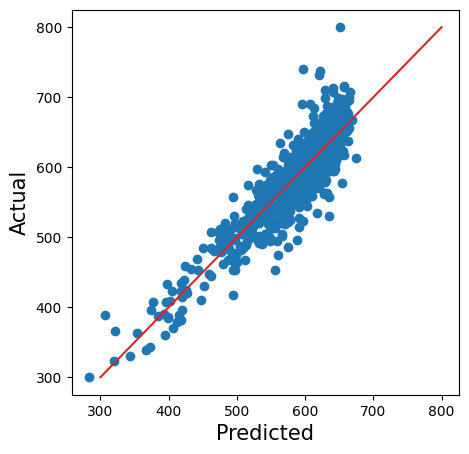

In [11]:
# Get model predictions
y_pred = model.predict(X)

# Plot predicted vs actual
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_pred,y)

# Plot y=x line
ax.plot([y.min(), y.max()], [y.min(), y.max()], color='tab:red')

plt.xlabel('Predicted',size=15)
plt.ylabel('Actual', size=15)
plt.show()

## **Feature Correlation Heatmap**

* To Check Multi-Collinearity

<Axes: >

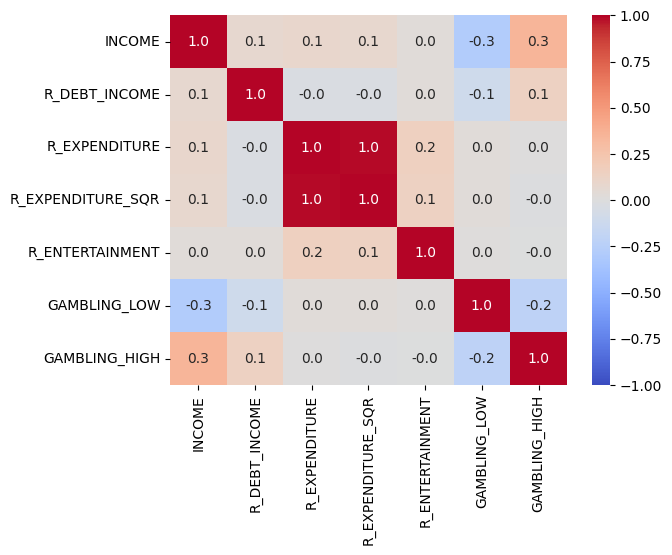

In [12]:
# Correlation matrix
corr_matrix = X.drop('const',axis=1).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", fmt=".1f", vmin=-1, vmax=1,annot=True)

## **Weight Plot**

Text(0.5, 0, 'Coefficient (Weight)')

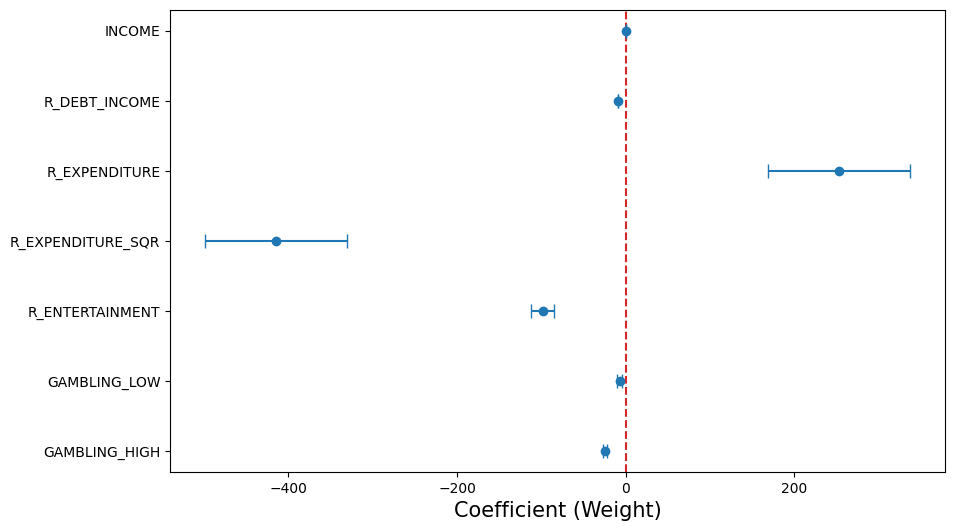

In [13]:
# Get coefficients and standard errors
coefficients = model.params[1:][::-1]
se = model.bse[1:][::-1]
features = X.columns[1:][::-1]

plt.figure(figsize=(10, 6))

# Plot vertical dotted line at x=0
plt.axvline(x=0, color='tab:red', linestyle='--')

# Plot the coefficients and error bars
plt.errorbar(coefficients, 
             features, 
             xerr=se, 
             fmt='o', 
             capsize=5)

plt.xlabel('Coefficient (Weight)', size=15)

## **Effect Plot**

In [19]:
# Calculate the feature effects 
feature_effects = X * model.params
feature_effects.head()

,const,INCOME,R_DEBT_INCOME,R_EXPENDITURE,R_EXPENDITURE_SQR,R_ENTERTAINMENT,GAMBLING_LOW,GAMBLING_HIGH
0,674.954489,2.998018,-148.096508,146.738850,-139.386828,-49.863710,-0.0,-24.823275
1,674.954489,6.953051,-37.865500,90.620163,-53.159537,-49.637280,-0.0,-0.000000
2,674.954489,2.786069,-160.129349,144.232874,-134.666640,-60.820928,-0.0,-24.823275
3,674.954489,7.268362,-72.197047,126.184780,-103.073129,-50.149208,-0.0,-24.823275
4,674.954489,13.514555,-148.096508,116.540567,-87.919612,-50.700514,-0.0,-24.823275


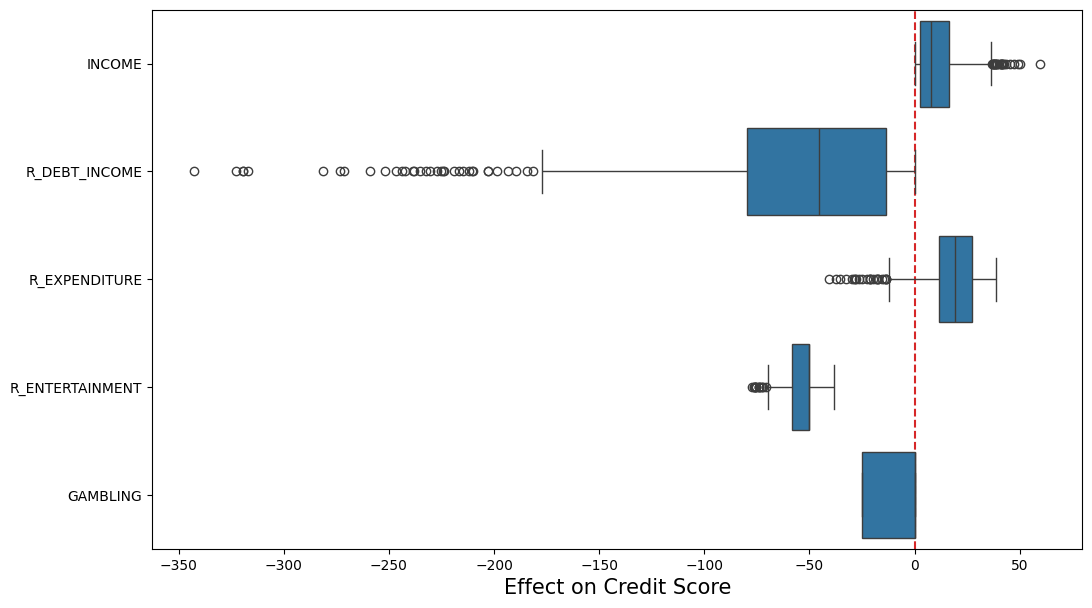

In [20]:
# Combine feature effects for related features
feature_effects['R_EXPENDITURE'] = feature_effects['R_EXPENDITURE'] + feature_effects['R_EXPENDITURE_SQR']
feature_effects['GAMBLING'] = feature_effects['GAMBLING_LOW']+feature_effects['GAMBLING_HIGH']
feature_effects.drop(['const','R_EXPENDITURE_SQR','GAMBLING_LOW','GAMBLING_HIGH'],axis=1,inplace=True)

# Create effect plots using boxplots
plt.figure(figsize=(12, 7))
plt.axvline(x=0, color='tab:red', linestyle='--')
sns.boxplot(data=feature_effects, orient="h", color="tab:Blue")
plt.xlabel("Effect on Credit Score", size=15)
plt.show()

## **Feature Effect**

Text(0.5, 0, 'Mean Effect on Credit Score')

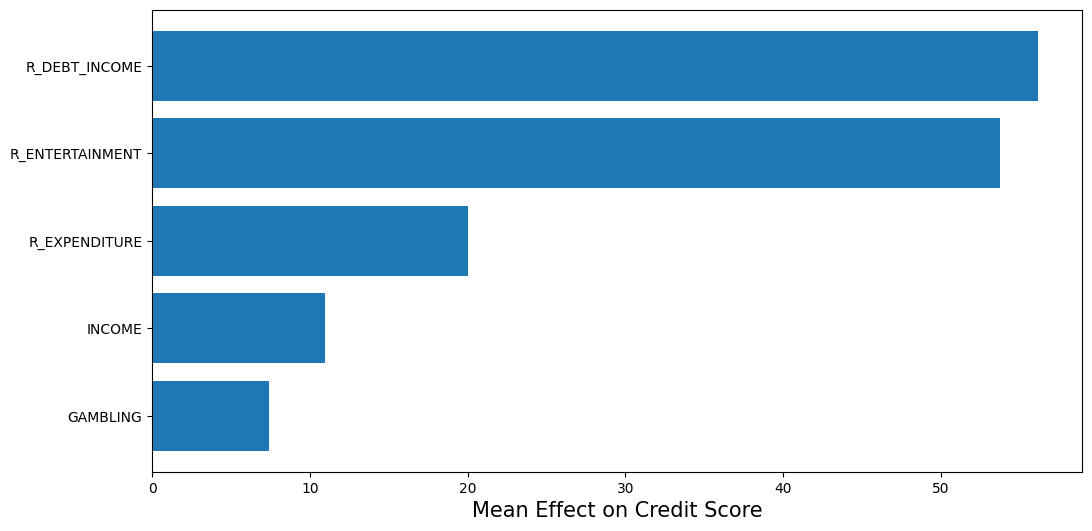

In [21]:
# Calculate the feature effects 
feature_effects = X * model.params

# Combine feature effects for related features
feature_effects['R_EXPENDITURE'] = feature_effects['R_EXPENDITURE'] + feature_effects['R_EXPENDITURE_SQR']
feature_effects['GAMBLING'] = feature_effects['GAMBLING_LOW']+feature_effects['GAMBLING_HIGH']
feature_effects.drop(['const','R_EXPENDITURE_SQR','GAMBLING_LOW','GAMBLING_HIGH'],axis=1,inplace=True)
# Calculate the absolute values of the feature effects
feature_effects = abs(feature_effects)
mean_effects = feature_effects.mean(axis=0)
# Sort by mean effect
mean_effects.sort_values(inplace=True)
# Create a bar plot for feature importance
plt.figure(figsize=(12, 6))
plt.barh(mean_effects.index, mean_effects)
plt.xlabel('Mean Effect on Credit Score', size=15)

## **Individual Effect Plot**

NameError: name 'const' is not defined

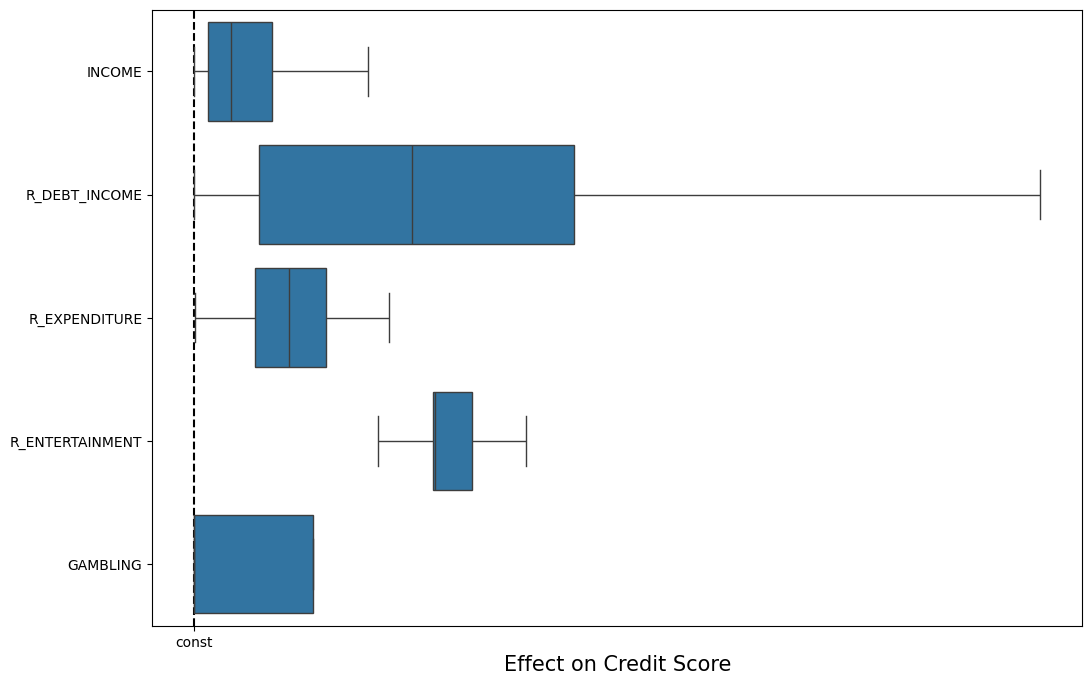

In [23]:
# Create effect plots using boxplots
plt.figure(figsize=(12, 8))
plt.axvline(x='const', color='black', linestyle='--')
sns.boxplot(data=feature_effects, orient="h", color="tab:Blue", showfliers=False)
plt.xlabel("Effect on Credit Score", size=15)

idx = 0  # You can change this to any valid index in your dataset
ind_feature_effect = X.iloc[idx] * model.params[1:]

# Combine feature effects for related features
ind_feature_effect['R_EXPENDITURE'] = ind_feature_effect['R_EXPENDITURE'] + ind_feature_effect['R_EXPENDITURE_SQR']
ind_feature_effect['GAMBLING'] = ind_feature_effect['GAMBLING_LOW']+ind_feature_effect['GAMBLING_HIGH']
ind_feature_effect.drop(['const','R_EXPENDITURE_SQR','GAMBLING_LOW','GAMBLING_HIGH'],axis=0,inplace=True)

# Add the constant to the feature effects
ind_feature_effect = ind_feature_effect + const
for i, feature in enumerate(ind_feature_effect):
    plt.scatter(feature, i, c='tab:red', marker='x', s=100, zorder=10)

## **SHAP Values**

In [28]:
import shap

# Calculate SHAP values
explainer = shap.KernelExplainer(model.predict,X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], show=False)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

# **References**
* https://www.kaggle.com/datasets/conorsully1/credit-score
* https://towardsdatascience.com/8-plots-for-explaining-linear-regression-to-a-layman-489b753da696
* https://www.youtube.com/watch?v=3032t--_wsg